<a href="https://colab.research.google.com/github/VikasBelida09/SP23-Team5/blob/main/Largescale_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<h1>Exploratory Analysis on Evernote Dataset</h1>

In [3]:
evernote_path="/content/drive/MyDrive/dataset/Evernote.xlsx"


In [4]:
evernote_df=pd.read_excel(evernote_path)


In [5]:
evernote_df=evernote_df.sort_values(by='Release Date',ascending=True)

In [6]:
evernote_df

,Feature Title,Feature Description,Release Date,Release Version
22,My Tasks : Personal Task Management,"Now see ONLY tasks assigned to you, or tasks y...",2022-01-04,10.28
21,Evernote and Google Calendar integration,When you have Evernote and Google Calendar con...,2022-01-19,10.29
20,Improvements to Calendar widget load times,Improvements to Calendar widget load times,2022-02-01,10.30
19,Save search with notebook filters,Save search is now available when filtering wi...,2022-02-26,10.31
18,Improved email notifications for shared notes/...,The app would send you an email every time som...,2022-03-03,10.32
17,Tag filtering now includes sub-tags.,"When you filter your tags, you can now choose ...",2022-03-03,10.32
16,PDF Preview and Recent Notes Editing Bug Fixes,There was a problem with previewing PDFs (only...,2022-03-11,10.33
15,Improved Calendar Loading Indicator to Prevent...,Calendar loading indicator improvements - this...,2022-03-31,10.34
14,Improved settings menu for easier access to ap...,We're making it easier for you to adjust the a...,2022-04-20,10.35
13,Enhancements to Editor and Navigation for Impr...,Keyboard navigation into and out of the editor...,2022-05-10,10.37


In [7]:
print(evernote_df.shape[0])

23


<h1>Total number of features in Evernote are 23</h1>

In [8]:
evernote_df['Release Month']=evernote_df['Release Date'].dt.month

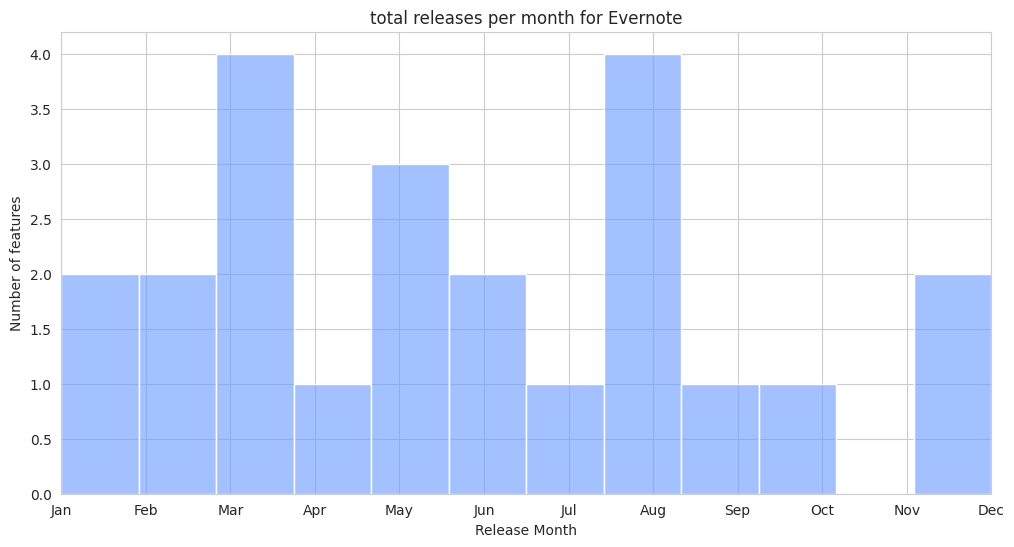

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plot=sns.histplot(data=evernote_df, x='Release Month',color=(0.4, 0.6, 1, 0.5),bins=12,alpha=0.6)
plt.xticks(range(1, 13), [pd.Timestamp(2022, i, 1).strftime('%b') for i in range(1, 13)])
plot.set(xlabel="Release Month", ylabel="Number of features",title="total releases per month for Evernote")
plt.xlim(1,12)
plt.show()

In [10]:
print(evernote_df.shape[0]/12)

1.9166666666666667


<h1>Average number of features per month is 2</h1>

In [11]:
evernote_df.describe()

,Release Version,Release Month
count,23.000000,23.000000
mean,10.381739,5.695652
std,0.064923,3.281280
min,10.280000,1.000000
25%,10.325000,3.000000
50%,10.380000,5.000000
75%,10.430000,8.000000
max,10.500000,12.000000


In [12]:
grouped_df = evernote_df.groupby('Release Month')['Feature Title'].count()

min_features = grouped_df.min()
max_features = grouped_df.max()

print(f"Minimum number of features released in a month: {min_features}")
print(f"Maximum number of features released in a month: {max_features}")


Minimum number of features released in a month: 1
Maximum number of features released in a month: 4


In [45]:
def word_tokenize(text):
  words=nltk.word_tokenize(text)
  return len(words)

In [46]:
total_tokens=evernote_df['Feature Description'].apply(word_tokenize).sum()

In [47]:
print(total_tokens)

1034


<h1>Total number of tokens in Feature Description column are 1034</h1>



In [48]:
total_tokens_feature_title=evernote_df['Feature Title'].apply(word_tokenize).sum()

In [49]:
print(total_tokens_feature_title)

163


<h1>Total number of tokens in Feature Title are 163</h1>

In [50]:
def sent_tokenize(text):
  sentences_per_feature=nltk.sent_tokenize(text)
  return len(sentences_per_feature)

In [51]:
avg_sentences_per_feature=evernote_df['Feature Description'].apply(sent_tokenize).sum()/evernote_df.shape[0]

In [52]:
avg_sentences_per_feature

2.130434782608696

<h1>Avg number of sentences per feature are 2.2</h1>

In [53]:
def avg_sentence_length(text):
    sentences = nltk.sent_tokenize(text)
    words_per_sentence = [len(nltk.word_tokenize(sentence)) for sentence in sentences]
    return sum(words_per_sentence) / len(sentences)

In [54]:
avg_sentence_len_per_feature=evernote_df['Feature Description'].apply(avg_sentence_length).sum()/evernote_df.shape[0]

In [55]:
avg_sentence_len_per_feature

21.26293995859213

<h1>Avg sentence length per feature is 21.3 (i.e 21 words per sentence)</h1>

<h1>Exploratory Analysis on Zoom Dataset</h1>

In [56]:
zoom_path="/content/drive/MyDrive/dataset/Zoom-features-2022.xlsx"

In [57]:
dfs = pd.read_excel(zoom_path, sheet_name=["Dec-2022", "Nov-2022", "Oct-2022", "Sept-2022", "Aug-2022", "July-2022", "June-2022", "May-2022", "April-2022", "March-2022", "Feb-2022", "Jan-2022"])
zoom_df = pd.concat(dfs.values(), ignore_index=True)

In [58]:
zoom_df['Release Month']=zoom_df['Release Date'].dt.month

In [59]:
l=zoom_df[zoom_df['Feature Title'].isnull()].index.tolist()

In [60]:
zoom_df=zoom_df.drop(l[0])

In [61]:
print(zoom_df.shape[0])

281


<h1>Total number of Features in Zoom dataset is 281</h1>

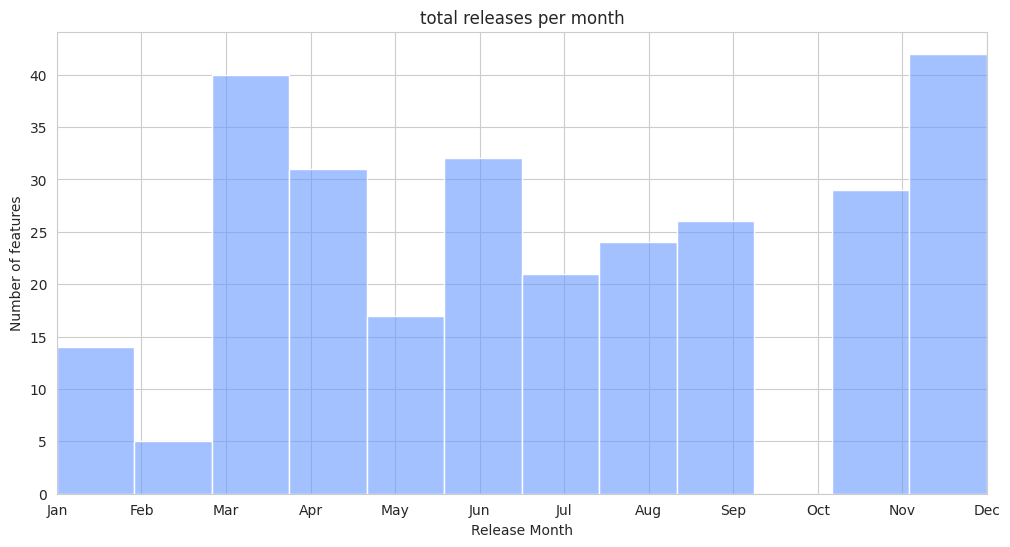

In [62]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plot=sns.histplot(data=zoom_df, x='Release Month',color=(0.4, 0.6, 1, 0.5),bins=12,alpha=0.6)
plt.xticks(range(1, 13), [pd.Timestamp(2022, i, 1).strftime('%b') for i in range(1, 13)])
plot.set(xlabel="Release Month", ylabel="Number of features",title="total releases per month")
plt.xlim(1,12)
plt.show()

In [63]:
print(zoom_df.shape[0]/12)

23.416666666666668


<h1>Average number of features released per month for zoom are 23</h1>

In [64]:
grouped_df = zoom_df.groupby('Release Month')['Feature Title'].count()

min_features = grouped_df.min()
max_features = grouped_df.max()

print(f"Minimum number of features released in a month: {min_features}")
print(f"Maximum number of features released in a month: {max_features}")

Minimum number of features released in a month: 5
Maximum number of features released in a month: 42


<h2>Minimum number of features released in a month: 5</h2>
<h2>Maximum number of features released in a month: 42</h2>

In [65]:
total_tokens_zoom=zoom_df['Feature Description'].apply(word_tokenize).sum()

In [66]:
total_tokens_zoom

12156

<h1>Total number of tokens in Feature Description column is 12156</h1>





In [67]:
total_tokens_zoom_feature_title=zoom_df['Feature Title'].apply(word_tokenize).sum()

In [68]:
total_tokens_zoom_feature_title

1809

<h1>Total number of tokens in Feature Title column is 1809</h1>


In [69]:
avg_sentences_per_feature_zoom=zoom_df['Feature Description'].apply(sent_tokenize).sum()/zoom_df.shape[0]

In [70]:
avg_sentences_per_feature_zoom

2.0676156583629894

<h1>Avg number of sentences per feature are 2.06761</h1>

In [71]:
avg_sentence_len_per_feature_zoom=zoom_df['Feature Description'].apply(avg_sentence_length).sum()/zoom_df.shape[0]

In [72]:
avg_sentence_len_per_feature_zoom

21.822479240806643

<h1>Avg sentence length per feature is 21.82 (i.e 22 words per sentence)</h1>

<h1>Exploratory Analysis on Webex Dataset</h1>

In [73]:
webex_path='/content/drive/MyDrive/dataset/webex-dataset.csv'

In [74]:
webex_df=pd.read_csv(webex_path)

In [75]:
df3=webex_df.copy()

In [77]:
print(df3.shape[0])

168


<h1>Total number of features in Webex are 168</h1>

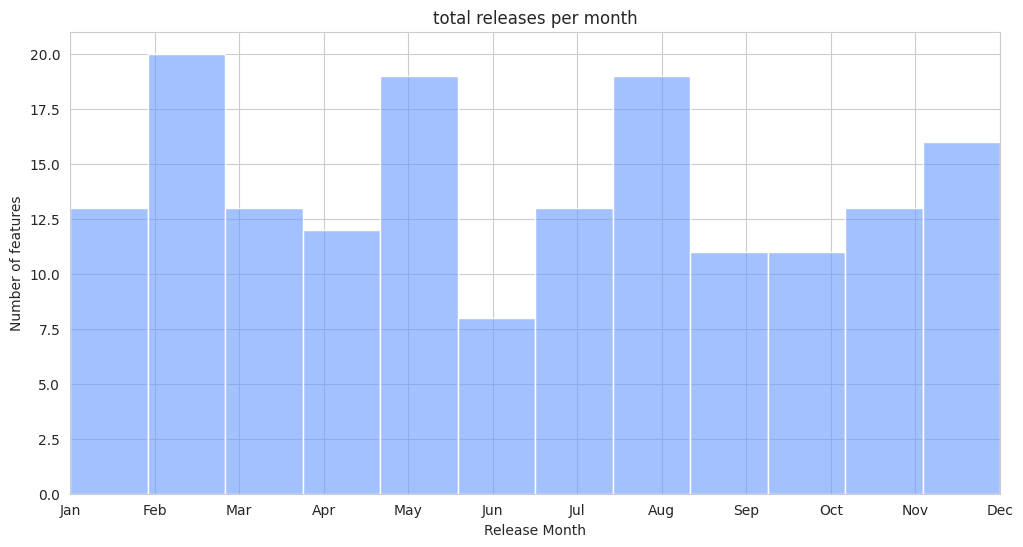

In [76]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plot=sns.histplot(data=df3, x='release_month',color=(0.4, 0.6, 1, 0.5),bins=12,alpha=0.6)
plt.xticks(range(1, 13), [pd.Timestamp(2022, i, 1).strftime('%b') for i in range(1, 13)])
plot.set(xlabel="Release Month", ylabel="Number of features",title="total releases per month")
plt.xlim(1,12)
plt.show()

In [78]:
print(df3.shape[0]/12)

14.0


<h1>Avg number of features released per month are 14</h1>

In [81]:
grouped_df = df3.groupby('release_month')['feature_title'].count()

min_features = grouped_df.min()
max_features = grouped_df.max()

print(f"Minimum number of features released in a month: {min_features}")
print(f"Maximum number of features released in a month: {max_features}")

Minimum number of features released in a month: 8
Maximum number of features released in a month: 20


<h1>Minimum number of features released in a month: 8</h1>
<h1>Maximum number of features released in a month: 20</h1>

In [82]:
total_tokens_webex=df3['feature_discription'].apply(word_tokenize).sum()

In [83]:
total_tokens_webex

13571

<h1>Total number of tokens in Feature description in webex are 13571</h1>

In [84]:
total_tokens_webex_feature_title=df3['feature_title'].apply(word_tokenize).sum()

In [85]:
total_tokens_webex_feature_title

1396

<h1>Total number of tokens in Feature title in webex are 1396</h1>

In [87]:
avg_sentences_per_feature_webex=df3['feature_discription'].apply(sent_tokenize).sum()/df3.shape[0]

In [88]:
avg_sentences_per_feature_webex

4.125

<h1>Avg number of sentences per feature are 4.125</h1>

In [89]:
avg_sentence_len_per_feature_webex=df3['feature_discription'].apply(avg_sentence_length).sum()/df3.shape[0]

In [90]:
avg_sentence_len_per_feature_webex

21.12501026051446

<h1>Avg sentence length per feature is 21.12 (i.e 21 words per sentence)</h1>